In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Clustering

In [6]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

--2022-03-01 15:27:55--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv.1’

seeds.csv.1         100%[===================>]   9.17K  --.-KB/s    in 0s      

2022-03-01 15:27:55 (64.6 MB/s) - ‘seeds.csv.1’ saved [9386/9386]



In [7]:
# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
41,13.50,13.85,0.8852,5.351,3.158,2.249
99,18.72,16.34,0.8810,6.219,3.684,2.188
44,15.11,14.54,0.8986,5.579,3.462,3.128
142,13.34,13.95,0.8620,5.389,3.074,5.995
183,11.65,13.07,0.8575,5.108,2.850,5.209
36,16.20,15.27,0.8734,5.826,3.464,2.823
31,15.49,14.94,0.8724,5.757,3.371,3.412
32,14.09,14.41,0.8529,5.717,3.186,3.920
139,16.23,15.18,0.8850,5.872,3.472,3.769
16,13.99,13.83,0.9183,5.119,3.383,5.234


As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

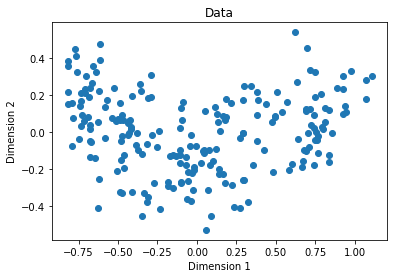

In [13]:
# Let us visualize the data points to our two dimensions
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

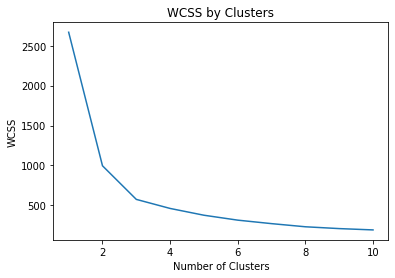

In [14]:
import numpy as np
from sklearn.cluster import KMeans

# Create 10 models form 0 to 10
wcss = []
for i  in range(1,11):
    kmeans = KMeans(n_clusters = i)
    
    # Fit the data points
    kmeans.fit(features.values)
    
    # Get the WCSS(inertia) value
    wcss.append(kmeans.inertia_)
    
# Plot the WCSS values onto a line graph
plt.plot(range(1,11), wcss)
plt.title("WCSS by Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## Summary

Here we looked at what clustering means, and how to determine whether clustering might be appropriate for your data. In the next notebook, we will look at two ways of 
labelling the data automatically.